In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_seoul_gun = pd.read_csv('./Data_Set/dataset_for_analysis.csv')

In [4]:
data_seoul_gun.drop(['Unnamed: 0'], axis=1, inplace=True)

In [13]:
data_seoul_gun = data_seoul_gun.iloc[:25,]

In [15]:
data_seoul_gun.columns

Index(['자치구', '스포츠_동호회_수', '장애인_커뮤니티', '내부시설수', '외부시설수', '소계_설치의무대상',
       '소계_설치완료', '매개시설_설치의무대상', '매개시설_설치완료', '내부시설_설치의무대상', '내부시설_설치완료',
       '위생시설_설치의무대상', '위생시설_설치완료', '안내시설_설치의무대상', '안내시설_설치완료', '기타시설_설치의무대상',
       '기타시설_설치완료', '지하철_엘리베이터_수', '구별_역수', '장애인_합계', '지체_인구', '뇌병변_인구',
       '시각_인구', '청각_인구', '언어_인구', '지적장애_인구', '정신장애_인구', '자폐성_인구', '신장장애_인구',
       '심장장애_인구', '호흡기_인구', '간_인구', '안면_인구', '장루/요루_인구', '뇌전증_인구',
       '전동보장구_급속충전소', '지하철_휠체어리프트_수', '2022년_생활체육_총강좌수', '장애인_의료_사회복지시설_수'],
      dtype='object')

### 장애인 문화 스포츠 인덱스 제작

In [16]:
data_for_cultural_index1 = data_seoul_gun[['스포츠_동호회_수', '장애인_커뮤니티', '내부시설수', '외부시설수', '2022년_생활체육_총강좌수', '장애인_의료_사회복지시설_수']].div(data_seoul_gun['장애인_합계'], axis=0)

In [18]:
data_for_cultural_index1

,스포츠_동호회_수,장애인_커뮤니티,내부시설수,외부시설수,2022년_생활체육_총강좌수,장애인_의료_사회복지시설_수
0,0.000132,0.000066,0.001316,0.000066,0.000132,0.001447
1,0.000273,0.000055,0.001529,0.000055,0.000328,0.000929
2,0.000401,0.000057,0.000573,0.000172,0.000115,0.000459
3,0.000522,0.000174,0.000661,0.000244,0.000104,0.000592
4,0.000049,0.000099,0.000790,0.000296,0.000247,0.000592
5,0.000162,0.000000,0.000405,0.000081,0.000486,0.000729
6,0.000055,0.000219,0.000164,0.000055,0.000219,0.000438
7,0.000176,0.000000,0.000000,0.000088,0.000351,0.000615
8,0.000549,0.000037,0.000366,0.000000,0.000366,0.001025
9,0.000274,0.000137,0.000548,0.000274,0.000411,0.000685


In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(data_for_cultural_index1)

culture_data_standardized = scaler.transform(data_for_cultural_index1)

culture_data_standardized = pd.DataFrame(culture_data_standardized, columns=data_for_cultural_index1.columns)

In [24]:
culture_data_standardized.index = data_seoul_gun['자치구']

In [25]:
culture_data_standardized

,스포츠_동호회_수,장애인_커뮤니티,내부시설수,외부시설수,2022년_생활체육_총강좌수,장애인_의료_사회복지시설_수
자치구,,,,,,
강남구,-0.681171,-0.492425,1.092378,-0.532016,-0.696199,2.233552
강동구,0.039245,-0.554136,1.449023,-0.603789,0.258910,0.653392
강북구,0.691931,-0.539145,-0.146777,0.150767,-0.778516,-0.777986
강서구,1.306800,0.105933,0.000162,0.611432,-0.828378,-0.372596
관악구,-1.099720,-0.310574,0.214035,0.948287,-0.135534,-0.371450
광진구,-0.526822,-0.856037,-0.428183,-0.434551,1.028046,0.044070
구로구,-1.072447,0.353351,-0.829836,-0.603271,-0.271437,-0.842113
금천구,-0.457149,-0.856037,-1.103751,-0.390555,0.373046,-0.303157
노원구,1.444491,-0.653675,-0.492643,-0.954915,0.445857,0.947588


In [41]:
culture_data_standardized.to_csv('./Standardized_Data_Set/장애인문화체육표준화데이터.csv')

In [169]:
col1 = ['스포츠_동호회_수', '2022년_생활체육_총강좌수', '장애인_의료_사회복지시설_수']
col2 = ['장애인_커뮤니티', '내부시설수', '외부시설수']

In [191]:
import pandas as pd
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
principal_components = pca.fit_transform(culture_data_standardized[col1])

loadings1_1 = pd.DataFrame(pca.components_.T, columns=['PC1','PC2','PC3'], index=col1)

In [192]:
loadings1_1

,PC1,PC2,PC3
스포츠_동호회_수,0.711703,0.052134,0.700543
2022년_생활체육_총강좌수,0.685513,-0.269397,-0.676385
장애인_의료_사회복지시설_수,0.153461,0.961617,-0.227469


In [193]:
relevant_components = loadings1_1  # Select the components that align with the concept of life quality

# Calculate index scores
index_scores_sport = pd.DataFrame(principal_components.dot(relevant_components.T))

In [194]:
index_scores_sport['자치구'] = data_seoul_gun['자치구']

In [199]:
Healthy_Life_Index = index_scores_sport.rename(columns = {0 : "Healthy_Life_Index"})[['자치구','Healthy_Life_Index']]

In [201]:
import pandas as pd
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
principal_components = pca.fit_transform(culture_data_standardized[col2])

loadings1_2 = pd.DataFrame(pca.components_.T, columns=['PC1','PC2','PC3'], index=col2)

In [202]:
loadings1_2

,PC1,PC2,PC3
장애인_커뮤니티,0.607055,0.424358,0.671866
내부시설수,0.487267,-0.866657,0.107128
외부시설수,0.627739,0.262345,-0.732884


In [204]:
relevant_components = loadings1_2  # Select the components that align with the concept of life quality

# Calculate index scores
index_scores_commun = pd.DataFrame(principal_components.dot(relevant_components.T))

In [205]:
index_scores_commun['자치구'] = data_seoul_gun['자치구']

In [206]:
Culture_commun_Index = index_scores_commun.rename(columns = {0 : "Culture_commun_Index"})[['자치구','Culture_commun_Index']]

In [207]:
Culture_commun_Index

,자치구,Culture_commun_Index
0,강남구,-0.492425
1,강동구,-0.554136
2,강북구,-0.539145
3,강서구,0.105933
4,관악구,-0.310574
5,광진구,-0.856037
6,구로구,0.353351
7,금천구,-0.856037
8,노원구,-0.653675
9,동작구,-0.099290


In [209]:
cul_spo_index_total = pd.merge(Culture_commun_Index, Healthy_Life_Index, on = '자치구')

In [210]:
cul_spo_index_total.to_csv('./Index/community_health_index.csv', index=False)

In [39]:
import matplotlib.font_manager as fm

# Set the font path and name
font_path = 'C:/Windows/Fonts/gulim.ttc'
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rcParams['font.family'] = font_name

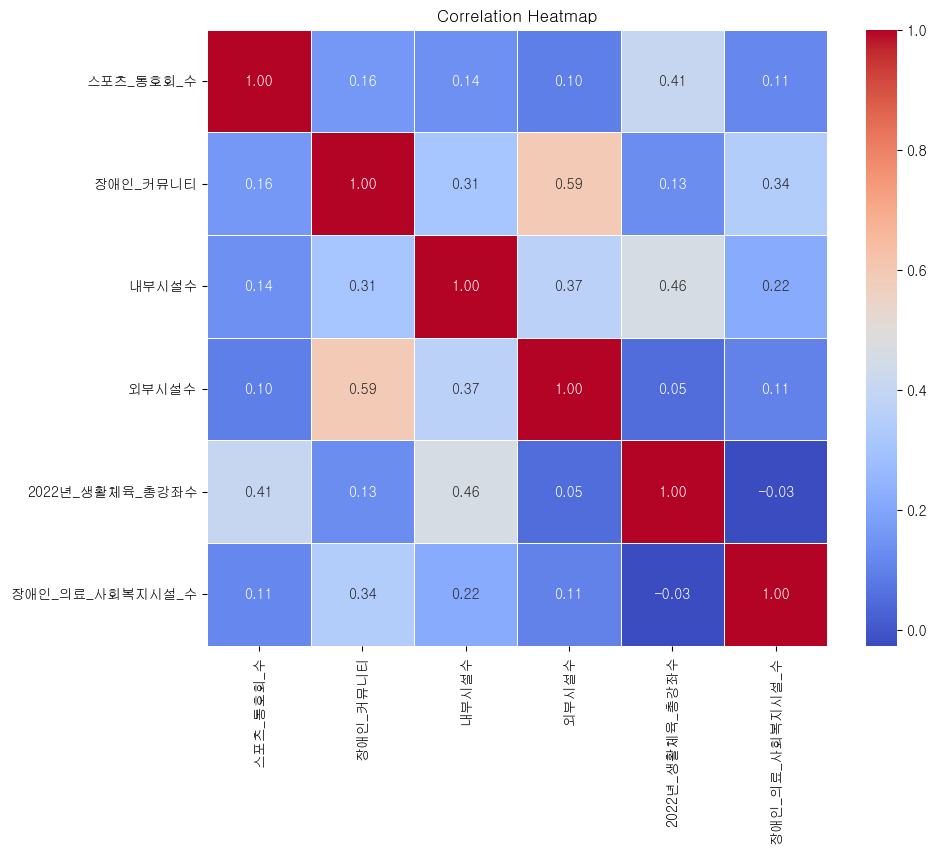

In [40]:
import seaborn as sns

correlation_matrix = culture_data_standardized.corr()

# Create a correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
correlation_table = correlation_matrix.style.background_gradient(cmap="coolwarm").format("{:.2f}")
print("Correlation Table:")
print(correlation_table)

### 접근성 지표

In [48]:
popul = data_seoul_gun[['매개시설_설치의무대상', '내부시설_설치의무대상', '위생시설_설치의무대상', '안내시설_설치의무대상', '기타시설_설치의무대상','장애인_합계', '지체_인구', '뇌병변_인구','시각_인구', '청각_인구', '언어_인구', '지적장애_인구', '정신장애_인구', '자폐성_인구', '신장장애_인구',
'심장장애_인구', '호흡기_인구', '간_인구', '안면_인구', '장루/요루_인구', '뇌전증_인구']]

In [52]:
data_app1 = data_seoul_gun[['매개시설_설치완료', '내부시설_설치완료','위생시설_설치완료','안내시설_설치완료','기타시설_설치완료',
                '지하철_엘리베이터_수','전동보장구_급속충전소', '지하철_휠체어리프트_수']]

In [53]:
data_app1

,매개시설_설치완료,내부시설_설치완료,위생시설_설치완료,안내시설_설치완료,기타시설_설치완료,지하철_엘리베이터_수,전동보장구_급속충전소,지하철_휠체어리프트_수
0,3273.0,5190.0,2973.0,180.0,62.0,53.0,24.0,5.0
1,1521.0,2683.0,834.0,125.0,6.0,47.0,22.0,4.0
2,618.0,878.0,188.0,8.0,23.0,8.0,21.0,0.0
3,1659.0,2760.0,670.0,83.0,0.0,27.0,37.0,3.0
4,669.0,1165.0,431.0,71.0,0.0,11.0,34.0,0.0
5,1165.0,1970.0,411.0,31.0,14.0,37.0,37.0,7.0
6,1019.0,1661.0,381.0,33.0,0.0,23.0,15.0,17.0
7,1127.0,1610.0,385.0,10.0,71.0,4.0,19.0,4.0
8,478.0,714.0,283.0,51.0,0.0,52.0,60.0,7.0
9,530.0,743.0,209.0,23.0,3.0,41.0,2.0,10.0


In [55]:
data_app1['매개시설_설치완료'] = data_app1[['매개시설_설치완료']].div(popul['매개시설_설치의무대상'], axis=0)
data_app1['내부시설_설치완료'] = data_app1[['내부시설_설치완료']].div(popul['내부시설_설치의무대상'], axis=0)
data_app1['위생시설_설치완료'] = data_app1[['위생시설_설치완료']].div(popul['위생시설_설치의무대상'], axis=0)
data_app1['안내시설_설치완료'] = data_app1[['안내시설_설치완료']].div(popul['안내시설_설치의무대상'], axis=0)
data_app1['기타시설_설치완료'] = data_app1[['기타시설_설치완료']].div(popul['기타시설_설치의무대상'], axis=0)

data_app1['지하철_엘리베이터_수'] = data_app1[['지하철_엘리베이터_수']].div(popul['지체_인구'], axis=0)
data_app1['전동보장구_급속충전소'] = data_app1[['전동보장구_급속충전소']].div(popul['지체_인구'], axis=0)
data_app1['지하철_휠체어리프트_수'] = data_app1[['지하철_휠체어리프트_수']].div(popul['지체_인구'], axis=0)

C:\Users\Popperkim\AppData\Local\Temp\ipykernel_1720\2217417431.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_app1['매개시설_설치완료'] = data_app1[['매개시설_설치완료']].div(popul['매개시설_설치의무대상'], axis=0)
C:\Users\Popperkim\AppData\Local\Temp\ipykernel_1720\2217417431.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_app1['내부시설_설치완료'] = data_app1[['내부시설_설치완료']].div(popul['내부시설_설치의무대상'], axis=0)
C:\Users\Popperkim\AppData\Local\Temp\ipykernel_1720\2217417431.py:3: SettingWithCopyWarning: 
A value is trying

In [62]:
data_app1.fillna(np.average(data_app1['기타시설_설치완료'].dropna()), inplace=True)

c:\Users\Popperkim\anaconda3\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [70]:
data_app1

,매개시설_설치완료,내부시설_설치완료,위생시설_설치완료,안내시설_설치완료,기타시설_설치완료,지하철_엘리베이터_수,전동보장구_급속충전소,지하철_휠체어리프트_수
0,0.996347,0.996161,0.977961,0.952381,1.000000,0.008721,0.003949,0.000823
1,1.000000,1.000000,0.990499,1.000000,0.272727,0.005907,0.002765,0.000503
2,1.000000,0.984305,0.940000,1.000000,0.958333,0.001040,0.002731,0.000000
3,1.000000,0.999276,0.997024,1.000000,0.903069,0.002203,0.003019,0.000245
4,0.995536,0.990646,0.943107,0.972603,0.903069,0.001235,0.003816,0.000000
5,1.000000,1.000000,0.980907,1.000000,1.000000,0.006615,0.006615,0.001252
6,0.996090,0.998797,0.900709,1.000000,0.903069,0.002793,0.001821,0.002064
7,1.000000,1.000000,0.994832,1.000000,0.986111,0.000775,0.003679,0.000775
8,1.000000,0.988920,0.992982,1.000000,0.903069,0.004400,0.005077,0.000592
9,1.000000,0.997315,1.000000,1.000000,1.000000,0.006505,0.000317,0.001587


In [71]:
scaler = StandardScaler()

scaler.fit(data_app1)


StandardScaler()

In [72]:
app_data_standardized = scaler.transform(data_app1)

In [77]:
app_data_standardized = pd.DataFrame(app_data_standardized, columns=data_app1.columns)

In [78]:
app_data_standardized

,매개시설_설치완료,내부시설_설치완료,위생시설_설치완료,안내시설_설치완료,기타시설_설치완료,지하철_엘리베이터_수,전동보장구_급속충전소,지하철_휠체어리프트_수
0,0.219463,-0.122472,0.146232,-0.090425,0.600597,0.117299,0.204934,-0.325188
1,0.704984,0.761202,0.587607,0.374476,-3.905686,-0.204121,-0.485030,-0.537476
2,0.704984,-2.851758,-1.190062,0.374476,0.342425,-0.759844,-0.504859,-0.870893
3,0.704984,0.594513,0.817301,0.374476,0.000000,-0.627050,-0.336887,-0.708531
4,0.111630,-1.392003,-1.080681,0.106999,0.000000,-0.737645,0.127487,-0.870893
5,0.704984,0.761202,0.249951,0.374476,0.600597,-0.123196,1.757973,-0.040793
6,0.185292,0.484356,-2.573184,0.374476,0.000000,-0.559700,-1.034555,0.498294
7,0.704984,0.761202,0.740146,0.374476,0.514540,-0.790187,0.047655,-0.357144
8,0.704984,-1.789459,0.675037,0.374476,0.000000,-0.376219,0.861576,-0.478072
9,0.704984,0.143223,0.922070,0.374476,0.600597,-0.135822,-1.910765,0.181384


In [79]:
app_data_standardized.index = data_seoul_gun['자치구']

In [80]:
app_data_standardized

,매개시설_설치완료,내부시설_설치완료,위생시설_설치완료,안내시설_설치완료,기타시설_설치완료,지하철_엘리베이터_수,전동보장구_급속충전소,지하철_휠체어리프트_수
자치구,,,,,,,,
강남구,0.219463,-0.122472,0.146232,-0.090425,0.600597,0.117299,0.204934,-0.325188
강동구,0.704984,0.761202,0.587607,0.374476,-3.905686,-0.204121,-0.485030,-0.537476
강북구,0.704984,-2.851758,-1.190062,0.374476,0.342425,-0.759844,-0.504859,-0.870893
강서구,0.704984,0.594513,0.817301,0.374476,0.000000,-0.627050,-0.336887,-0.708531
관악구,0.111630,-1.392003,-1.080681,0.106999,0.000000,-0.737645,0.127487,-0.870893
광진구,0.704984,0.761202,0.249951,0.374476,0.600597,-0.123196,1.757973,-0.040793
구로구,0.185292,0.484356,-2.573184,0.374476,0.000000,-0.559700,-1.034555,0.498294
금천구,0.704984,0.761202,0.740146,0.374476,0.514540,-0.790187,0.047655,-0.357144
노원구,0.704984,-1.789459,0.675037,0.374476,0.000000,-0.376219,0.861576,-0.478072


In [81]:
app_data_standardized.to_csv("./Standardized_Data_Set/장애인접근성데이터표준화.csv")

In [82]:
app1_list = ['매개시설_설치완료', '내부시설_설치완료','위생시설_설치완료','안내시설_설치완료']
app2_list = ['지하철_엘리베이터_수','전동보장구_급속충전소', '지하철_휠체어리프트_수']

In [126]:
import pandas as pd
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
principal_components = pca.fit_transform(app_data_standardized[app1_list])

loadings2 = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3','PC4'], index=app1_list)

In [127]:
loadings2

,PC1,PC2,PC3,PC4
매개시설_설치완료,-0.513371,-0.436309,-0.738970,0.002725
내부시설_설치완료,-0.530352,0.464594,0.096723,0.702512
위생시설_설치완료,-0.547623,0.422702,0.128243,-0.710623
안내시설_설치완료,-0.394064,-0.644290,0.654310,0.038510


In [128]:
relevant_components = loadings2[['PC1','PC2','PC3','PC4']]  # Select the components that align with the concept of life quality

# Calculate index scores
index_scores = pd.DataFrame(principal_components.dot(relevant_components.T))


In [129]:
index_scores['자치구'] = data_seoul_gun['자치구']

In [130]:
Facility_Index = index_scores.rename(columns={0 : "Facility_Index"})[['Facility_Index','자치구']]

In [131]:
Facility_Index

,Facility_Index,자치구
0,0.219463,강남구
1,0.704984,강동구
2,0.704984,강북구
3,0.704984,강서구
4,0.111630,관악구
5,0.704984,광진구
6,0.185292,구로구
7,0.704984,금천구
8,0.704984,노원구
9,0.704984,동작구


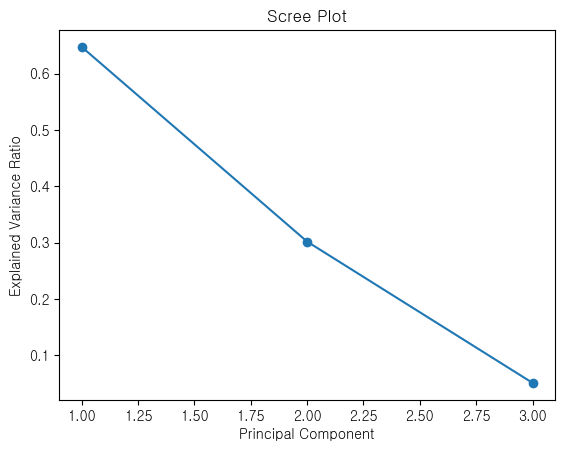

In [99]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plot explained variance ratio
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

In [88]:
import matplotlib.font_manager as fm

# Set the font path and name
font_path = 'C:/Windows/Fonts/gulim.ttc'
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rcParams['font.family'] = font_name

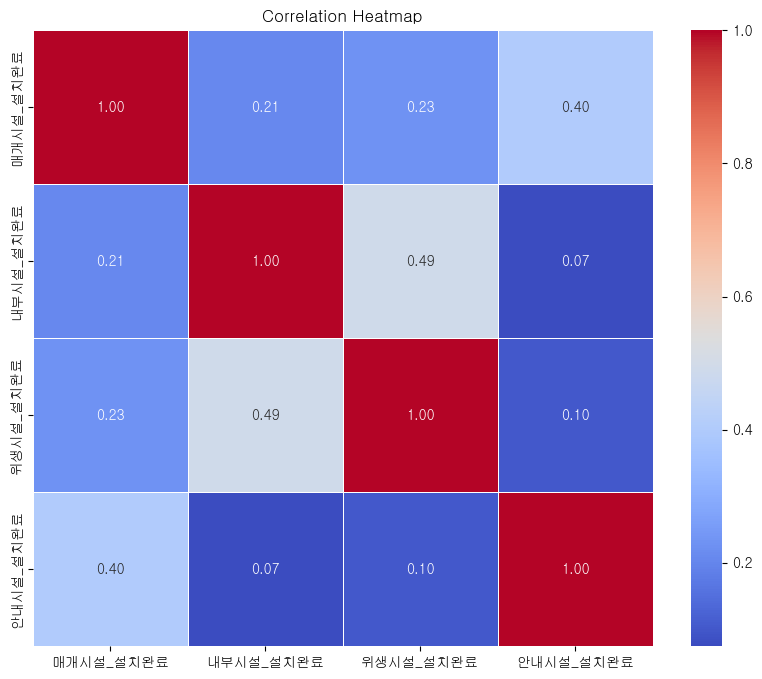

In [90]:
import seaborn as sns

correlation_matrix = app_data_standardized[app1_list].corr()

# Create a correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [132]:
import pandas as pd
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
principal_components = pca.fit_transform(app_data_standardized[app2_list])

loadings3 = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3'], index=app2_list)

In [133]:
loadings3

,PC1,PC2,PC3
지하철_엘리베이터_수,0.682107,-0.140040,-0.717718
전동보장구_급속충전소,0.319106,0.940111,0.119840
지하철_휠체어리프트_수,0.657952,-0.310772,0.685944


In [134]:
relevant_components = loadings3[['PC1','PC2','PC3']]  # Select the components that align with the concept of life quality

# Calculate index scores
index_scores = pd.DataFrame(principal_components.dot(relevant_components.T))

In [135]:
index_scores['자치구'] = data_seoul_gun['자치구']

In [141]:
Physical_Accessibility_Index = index_scores.rename(columns={0 : "Physical_Accessibility_Index"})[['자치구','Physical_Accessibility_Index']]

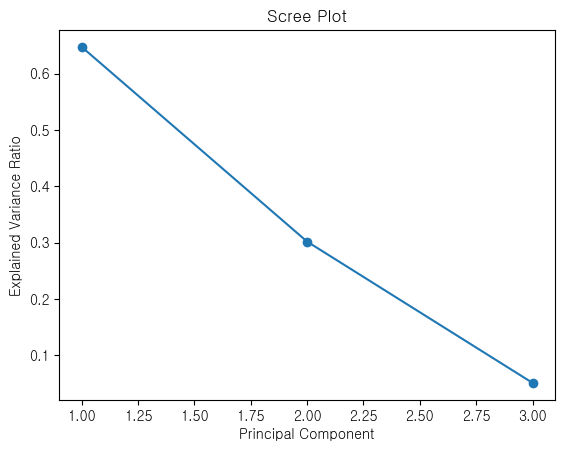

In [95]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plot explained variance ratio
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

In [97]:
import matplotlib.font_manager as fm

# Set the font path and name
font_path = 'C:/Windows/Fonts/gulim.ttc'
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rcParams['font.family'] = font_name

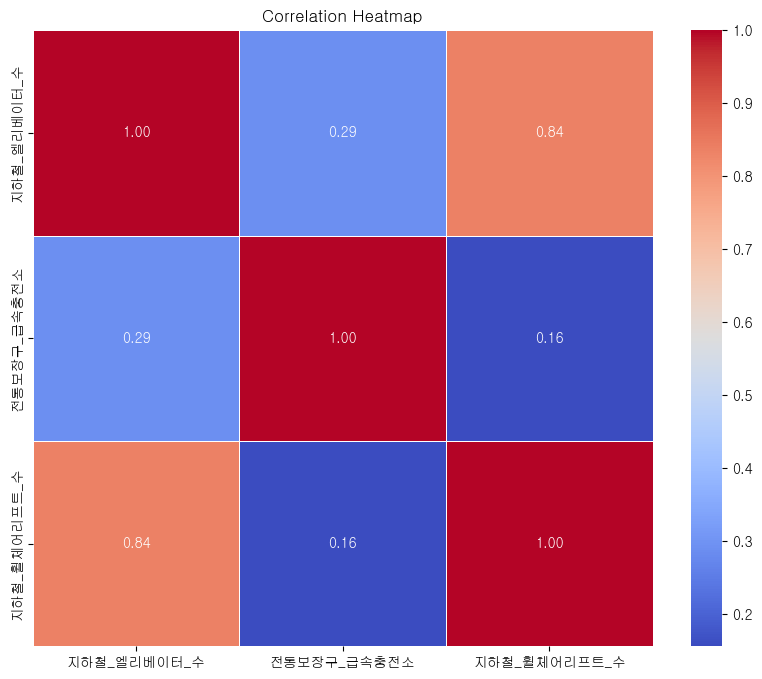

In [98]:
import seaborn as sns

correlation_matrix = app_data_standardized[app2_list].corr()

# Create a correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [138]:
Physical_Accessibility_Index

,Physical_Accessibility_Index,자치구
0,0.117299,강남구
1,-0.204121,강동구
2,-0.759844,강북구
3,-0.627050,강서구
4,-0.737645,관악구
5,-0.123196,광진구
6,-0.559700,구로구
7,-0.790187,금천구
8,-0.376219,노원구
9,-0.135822,동작구


In [139]:
Facility_Index

,Facility_Index,자치구
0,0.219463,강남구
1,0.704984,강동구
2,0.704984,강북구
3,0.704984,강서구
4,0.111630,관악구
5,0.704984,광진구
6,0.185292,구로구
7,0.704984,금천구
8,0.704984,노원구
9,0.704984,동작구


In [143]:
Accessibility_Index_gun = pd.merge(Physical_Accessibility_Index, Facility_Index, on='자치구')

In [144]:
Accessibility_Index_gun.to_csv('./Index/Accessibility_Index_gun.csv')